In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [82]:
df_cus=pd.read_csv('Train.csv')
df_acc=pd.read_csv('Train_AccountInfo.csv')
df_dem=pd.read_csv('Train_Demographics.csv')
df_ser=pd.read_csv('Train_ServicesOptedFor.csv')

In [83]:
df_ser.sort_values(['CustomerID']).head(20)

,CustomerID,TypeOfService,SeviceDetails
46537,Cust1201,MultipleLines,No
5218,Cust1201,OnlineBackup,No
25444,Cust1201,TechnicalSupport,No
17574,Cust1201,InternetServiceCategory,Fiber optic
20430,Cust1201,HasPhoneService,1
27966,Cust1201,StreamingTelevision,Yes
30595,Cust1201,DeviceProtection,Yes
26505,Cust1201,OnlineSecurity,No
14828,Cust1201,StreamingMovies,Yes
46757,Cust1202,OnlineBackup,No internet service


In [84]:
print(df_cus['CustomerID'].count())
print(df_acc['CustomerID'].count())
print(df_dem['HouseholdID'].count())
print(df_ser['CustomerID'].count())

5298
5298
5298
47682


In [85]:
#So there are more records in the df_ser than others,Let's analyse this further in the following steps

# df_cus

In [86]:
df_cus.count()

CustomerID    5298
Churn         5298
dtype: int64

In [87]:
df_cus.isnull().sum()
#No NULL values present

CustomerID    0
Churn         0
dtype: int64

In [88]:
df_cus.head()

,CustomerID,Churn
0,Cust4327,Yes
1,Cust3826,No
2,Cust6200,No
3,Cust1467,No
4,Cust4843,No


# df_acc

In [89]:
df_acc.isnull().sum()
#NaN values present in the columns TotalCharges and ContractType

CustomerID           0
BaseCharges          0
DOC                  0
TotalCharges         8
DOE                  0
ElectronicBilling    0
ContractType         5
PaymentMethod        0
dtype: int64

In [90]:
df_acc['ContractType'].count()

5293

In [91]:
# Taking care of missing data for the TotalCharges
#as the missing data is in 8+3 rows atmost which is less compared to the 5298.So we can drop those rows
df_acc.dropna(axis=0,inplace=True)

In [92]:
df_acc.count()
#13 CustomerID have been deleted

CustomerID           5285
BaseCharges          5285
DOC                  5285
TotalCharges         5285
DOE                  5285
ElectronicBilling    5285
ContractType         5285
PaymentMethod        5285
dtype: int64

In [93]:
df_acc.isnull().sum()

CustomerID           0
BaseCharges          0
DOC                  0
TotalCharges         0
DOE                  0
ElectronicBilling    0
ContractType         0
PaymentMethod        0
dtype: int64

In [94]:
df_acc.head()

,CustomerID,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod
0,Cust1450,417.75,5-1-2012,3400.25,10-May-11,Yes,Month-to-month,Electronic check
1,Cust4452,500.00,5-1-2012,7673.75,12-Sep-10,Yes,Month-to-month,Electronic check
2,Cust1681,394.00,5-1-2012,8206.5,15-May-10,No,Month-to-month,Electronic check
3,Cust4761,398.75,5-1-2012,5559.25,12-Oct-10,Yes,Month-to-month,Electronic check
4,Cust1785,447.25,5-1-2012,4265.5,10-Apr-11,No,Month-to-month,Electronic check


# df_dem

In [95]:
df_dem.count()

HouseholdID      5298
Country          5298
State            5298
Retired          5298
HasPartner       5298
HasDependents    5298
Education        5288
Gender           5294
dtype: int64

In [96]:
df_dem.Education.value_counts(dropna=False)

Highschool or below         1426
Graduation                  1370
Masters                     1265
ProfessionalQalification    1186
Other                         41
NaN                           10
Name: Education, dtype: int64

In [97]:
df_dem.Gender.value_counts(dropna=False)

Male      2656
Female    2638
NaN          4
Name: Gender, dtype: int64

In [98]:
df_dem.isnull().sum()
#Education has 10 NULL values and Gender has 4 Null Values.As these are comparitively less than the total
#count5298,we can delete these rows

HouseholdID       0
Country           0
State             0
Retired           0
HasPartner        0
HasDependents     0
Education        10
Gender            4
dtype: int64

In [99]:
df_dem.dropna(axis=0,inplace=True)

In [100]:
df_dem.isnull().sum()
#no NUll values now

HouseholdID      0
Country          0
State            0
Retired          0
HasPartner       0
HasDependents    0
Education        0
Gender           0
dtype: int64

In [101]:
df_dem.count()

HouseholdID      5284
Country          5284
State            5284
Retired          5284
HasPartner       5284
HasDependents    5284
Education        5284
Gender           5284
dtype: int64

In [102]:
df_dem['HouseholdID'].nunique()
#So 14 Customers/HousholdID's have been removed

5284

In [103]:
df_dem.Country.value_counts()

India    5279
?           5
Name: Country, dtype: int64

In [104]:
df_dem.State.value_counts()

Maharashtra    5276
?                 8
Name: State, dtype: int64

In [105]:
#Both the Country and State Columns values will no impact on the model as all the Customers have same Value,
#The missing values(?) will also be replaced by the same names India and Maharasthra with any method(Imputer or any other)as 
#only 1 unique value is presnet in the both the columns 

In [106]:
#So these 2 columns can be dropped
df_dem.drop(['Country','State'],axis=1,inplace=True)

In [107]:
df_dem.head()

,HouseholdID,Retired,HasPartner,HasDependents,Education,Gender
0,Cust5390,0,2,2,Graduation,Female
1,Cust4417,1,1,2,Highschool or below,Male
2,Cust4377,0,1,2,Highschool or below,Female
3,Cust5271,0,2,2,Masters,Female
4,Cust4914,0,1,2,Highschool or below,Female


# df_ser

In [108]:
df_ser.head()

,CustomerID,TypeOfService,SeviceDetails
0,Cust2034,MultipleLines,No
1,Cust4545,OnlineSecurity,No internet service
2,Cust2067,StreamingTelevision,No internet service
3,Cust1885,OnlineSecurity,No internet service
4,Cust4663,MultipleLines,No


In [109]:
df_ser.isnull().sum()
#No NUll Values here

CustomerID       0
TypeOfService    0
SeviceDetails    0
dtype: int64

In [110]:
df_ser.TypeOfService.value_counts()
#9 Type of services are assigned to each customer,So using Pivot converting this table into the below format

MultipleLines              5298
DeviceProtection           5298
InternetServiceCategory    5298
StreamingMovies            5298
OnlineSecurity             5298
TechnicalSupport           5298
StreamingTelevision        5298
HasPhoneService            5298
OnlineBackup               5298
Name: TypeOfService, dtype: int64

In [111]:
df_se=df_ser.pivot(index='CustomerID',columns='TypeOfService',values='SeviceDetails').sort_values('CustomerID')

In [112]:
del df_se.columns.name

In [113]:
df_se=df_se.reset_index()
df_se.head()

,CustomerID,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust1201,Yes,1,Fiber optic,No,No,No,Yes,Yes,No
1,Cust1202,No internet service,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
2,Cust1203,No,1,Fiber optic,No,No,No,Yes,No,No
3,Cust1204,No,1,DSL,Yes,Yes,Yes,No,No,Yes
4,Cust1205,No,1,Fiber optic,Yes,No,No,No,No,No


# Merging all the dataframes into 1 dataframe df_final

In [114]:
df_final=pd.merge(pd.merge((pd.merge(df_cus,df_acc,on='CustomerID')),df_dem,left_on='CustomerID',right_on='HouseholdID').drop('HouseholdID',axis=1),df_se,on='CustomerID')

In [115]:
df_final.head()

,CustomerID,Churn,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust4327,Yes,372.00,5-1-2012,1498.5,7-Sep-11,Yes,Month-to-month,Electronic check,0,...,Male,Yes,1,DSL,No,No,No,Yes,Yes,Yes
1,Cust3826,No,100.50,5-1-2012,5438.5,1-May-07,Yes,Two year,Bank transfer (automatic),0,...,Female,No internet service,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
2,Cust6200,No,399.25,5-1-2012,10005,15-Jan-10,Yes,Month-to-month,Credit card (automatic),0,...,Male,No,1,Fiber optic,No,No,No,Yes,No,No
3,Cust1467,No,245.00,5-1-2012,245,6-Dec-11,No,Month-to-month,Credit card (automatic),0,...,Male,No,1,DSL,No,No,No,No,No,Yes
4,Cust4843,No,320.25,5-1-2012,3669.75,9-Feb-11,No,Month-to-month,Bank transfer (automatic),0,...,Female,Yes,1,DSL,No,No,Yes,Yes,No,No


In [116]:
df_final.DOC.value_counts()
#as the DOC,Date of Churn is same for all,we can ignore this feature


5-1-2012    5271
Name: DOC, dtype: int64

In [117]:
df_final.drop(['DOC'],axis=1,inplace=True)

In [118]:
#Converting the DOE into DateTime Format
df_final['DOE']=pd.to_datetime(df_final['DOE'])

In [119]:
df_final.head()

,CustomerID,Churn,BaseCharges,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,...,Gender,DeviceProtection,HasPhoneService,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport
0,Cust4327,Yes,372.00,1498.5,2011-09-07,Yes,Month-to-month,Electronic check,0,2,...,Male,Yes,1,DSL,No,No,No,Yes,Yes,Yes
1,Cust3826,No,100.50,5438.5,2007-05-01,Yes,Two year,Bank transfer (automatic),0,1,...,Female,No internet service,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
2,Cust6200,No,399.25,10005,2010-01-15,Yes,Month-to-month,Credit card (automatic),0,2,...,Male,No,1,Fiber optic,No,No,No,Yes,No,No
3,Cust1467,No,245.00,245,2011-12-06,No,Month-to-month,Credit card (automatic),0,2,...,Male,No,1,DSL,No,No,No,No,No,Yes
4,Cust4843,No,320.25,3669.75,2011-02-09,No,Month-to-month,Bank transfer (automatic),0,2,...,Female,Yes,1,DSL,No,No,Yes,Yes,No,No


In [120]:
#Splitting the DOE date Column
df_final['DOE_Year']=df_final['DOE'].dt.year
df_final['DOE_Month']=df_final['DOE'].dt.month
df_final['DOE_Day']=df_final['DOE'].dt.day
#Now drop the original DOE
df_final.drop(['DOE'],axis=1,inplace=True)

In [121]:
df_final.CustomerID.count()

5271

In [122]:
df_final.CustomerID.nunique()

5271

In [123]:
#we can drop the CustomerID as it is unique all over the dataframe
df_final.drop(['CustomerID'],axis=1,inplace=True)

In [124]:
df_final.head()

,Churn,BaseCharges,TotalCharges,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,Education,...,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport,DOE_Year,DOE_Month,DOE_Day
0,Yes,372.00,1498.5,Yes,Month-to-month,Electronic check,0,2,2,Masters,...,DSL,No,No,No,Yes,Yes,Yes,2011,9,7
1,No,100.50,5438.5,Yes,Two year,Bank transfer (automatic),0,1,1,Graduation,...,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,2007,5,1
2,No,399.25,10005,Yes,Month-to-month,Credit card (automatic),0,2,2,Graduation,...,Fiber optic,No,No,No,Yes,No,No,2010,1,15
3,No,245.00,245,No,Month-to-month,Credit card (automatic),0,2,2,Masters,...,DSL,No,No,No,No,No,Yes,2011,12,6
4,No,320.25,3669.75,No,Month-to-month,Bank transfer (automatic),0,2,2,ProfessionalQalification,...,DSL,No,No,Yes,Yes,No,No,2011,2,9


In [125]:
df_final.DeviceProtection.value_counts()

No                     2241
Yes                    1882
No internet service    1148
Name: DeviceProtection, dtype: int64

In [126]:
df_final.head()

,Churn,BaseCharges,TotalCharges,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,Education,...,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport,DOE_Year,DOE_Month,DOE_Day
0,Yes,372.00,1498.5,Yes,Month-to-month,Electronic check,0,2,2,Masters,...,DSL,No,No,No,Yes,Yes,Yes,2011,9,7
1,No,100.50,5438.5,Yes,Two year,Bank transfer (automatic),0,1,1,Graduation,...,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,2007,5,1
2,No,399.25,10005,Yes,Month-to-month,Credit card (automatic),0,2,2,Graduation,...,Fiber optic,No,No,No,Yes,No,No,2010,1,15
3,No,245.00,245,No,Month-to-month,Credit card (automatic),0,2,2,Masters,...,DSL,No,No,No,No,No,Yes,2011,12,6
4,No,320.25,3669.75,No,Month-to-month,Bank transfer (automatic),0,2,2,ProfessionalQalification,...,DSL,No,No,Yes,Yes,No,No,2011,2,9


In [127]:
#removing the rows where the TotalCharges are 'MISSINGVAL'
df_final=df_final[df_final['TotalCharges']!='MISSINGVAL']

In [128]:
df_final['TotalCharges']=pd.to_numeric(df_final['TotalCharges'])

In [129]:
df_final[['Retired','HasPartner','HasDependents','DOE_Year','DOE_Month','DOE_Day']]=df_final[['Retired','HasPartner','HasDependents','DOE_Year','DOE_Month','DOE_Day']].astype(float)

In [130]:
df_final.iloc[:,1:].head()

,BaseCharges,TotalCharges,ElectronicBilling,ContractType,PaymentMethod,Retired,HasPartner,HasDependents,Education,Gender,...,InternetServiceCategory,MultipleLines,OnlineBackup,OnlineSecurity,StreamingMovies,StreamingTelevision,TechnicalSupport,DOE_Year,DOE_Month,DOE_Day
0,372.00,1498.50,Yes,Month-to-month,Electronic check,0.0,2.0,2.0,Masters,Male,...,DSL,No,No,No,Yes,Yes,Yes,2011.0,9.0,7.0
1,100.50,5438.50,Yes,Two year,Bank transfer (automatic),0.0,1.0,1.0,Graduation,Female,...,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,2007.0,5.0,1.0
2,399.25,10005.00,Yes,Month-to-month,Credit card (automatic),0.0,2.0,2.0,Graduation,Male,...,Fiber optic,No,No,No,Yes,No,No,2010.0,1.0,15.0
3,245.00,245.00,No,Month-to-month,Credit card (automatic),0.0,2.0,2.0,Masters,Male,...,DSL,No,No,No,No,No,Yes,2011.0,12.0,6.0
4,320.25,3669.75,No,Month-to-month,Bank transfer (automatic),0.0,2.0,2.0,ProfessionalQalification,Female,...,DSL,No,No,Yes,Yes,No,No,2011.0,2.0,9.0


In [131]:
df_final.dtypes

Churn                       object
BaseCharges                float64
TotalCharges               float64
ElectronicBilling           object
ContractType                object
PaymentMethod               object
Retired                    float64
HasPartner                 float64
HasDependents              float64
Education                   object
Gender                      object
DeviceProtection            object
HasPhoneService             object
InternetServiceCategory     object
MultipleLines               object
OnlineBackup                object
OnlineSecurity              object
StreamingMovies             object
StreamingTelevision         object
TechnicalSupport            object
DOE_Year                   float64
DOE_Month                  float64
DOE_Day                    float64
dtype: object

In [132]:
df_final.count()

Churn                      5269
BaseCharges                5269
TotalCharges               5269
ElectronicBilling          5269
ContractType               5269
PaymentMethod              5269
Retired                    5269
HasPartner                 5269
HasDependents              5269
Education                  5269
Gender                     5269
DeviceProtection           5269
HasPhoneService            5269
InternetServiceCategory    5269
MultipleLines              5269
OnlineBackup               5269
OnlineSecurity             5269
StreamingMovies            5269
StreamingTelevision        5269
TechnicalSupport           5269
DOE_Year                   5269
DOE_Month                  5269
DOE_Day                    5269
dtype: int64

In [133]:
df_final.isnull().sum()

Churn                      0
BaseCharges                0
TotalCharges               0
ElectronicBilling          0
ContractType               0
PaymentMethod              0
Retired                    0
HasPartner                 0
HasDependents              0
Education                  0
Gender                     0
DeviceProtection           0
HasPhoneService            0
InternetServiceCategory    0
MultipleLines              0
OnlineBackup               0
OnlineSecurity             0
StreamingMovies            0
StreamingTelevision        0
TechnicalSupport           0
DOE_Year                   0
DOE_Month                  0
DOE_Day                    0
dtype: int64

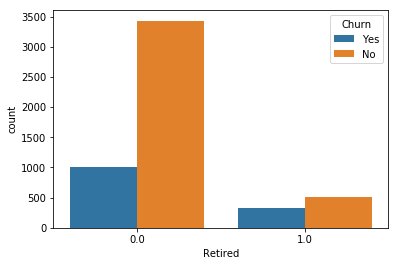

In [134]:
sns.countplot(x='Retired',data=df_final,hue='Churn')

In [135]:
#from the above we can say that in the Non-retired people the count of Churn is very less when compared to the Non CHurn ones, 
#But in the Retired customers the churn and non churn are nearly equal..So the retired customers are more likely 
#to disconnect

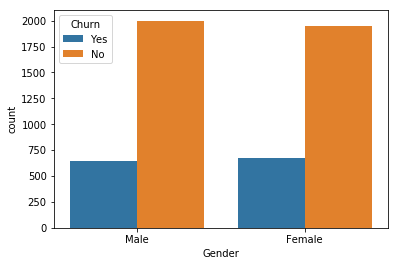

In [136]:
sns.countplot(x='Gender',data=df_final,hue='Churn')

In [137]:
#from the above we can see unlike Retired case , there is no much difference between the Male and Female related to CHurning

[Text(0, 0, 'Other'),
 Text(0, 0, 'Highschool or below'),
 Text(0, 0, 'Graduation'),
 Text(0, 0, 'ProfessionalQalification'),
 Text(0, 0, 'Masters')]

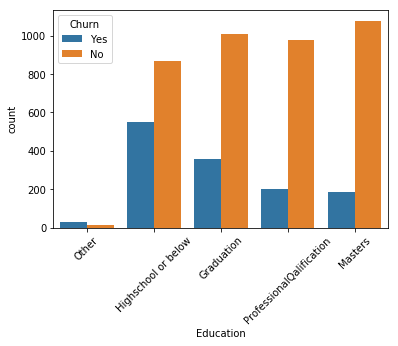

In [168]:
plot1=sns.countplot(x='Education',data=df_final,hue='Churn',order=['Other','Highschool or below','Graduation',
                                                                  'ProfessionalQalification','Masters'])
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45)

In [ ]:
# From the above graph we can see that the Churning is high for the people  with low Qualification
#We say that this might be due to the Requirements of technology use and its affordabality has increased

In [ ]:
#We can say much more such information from the available data

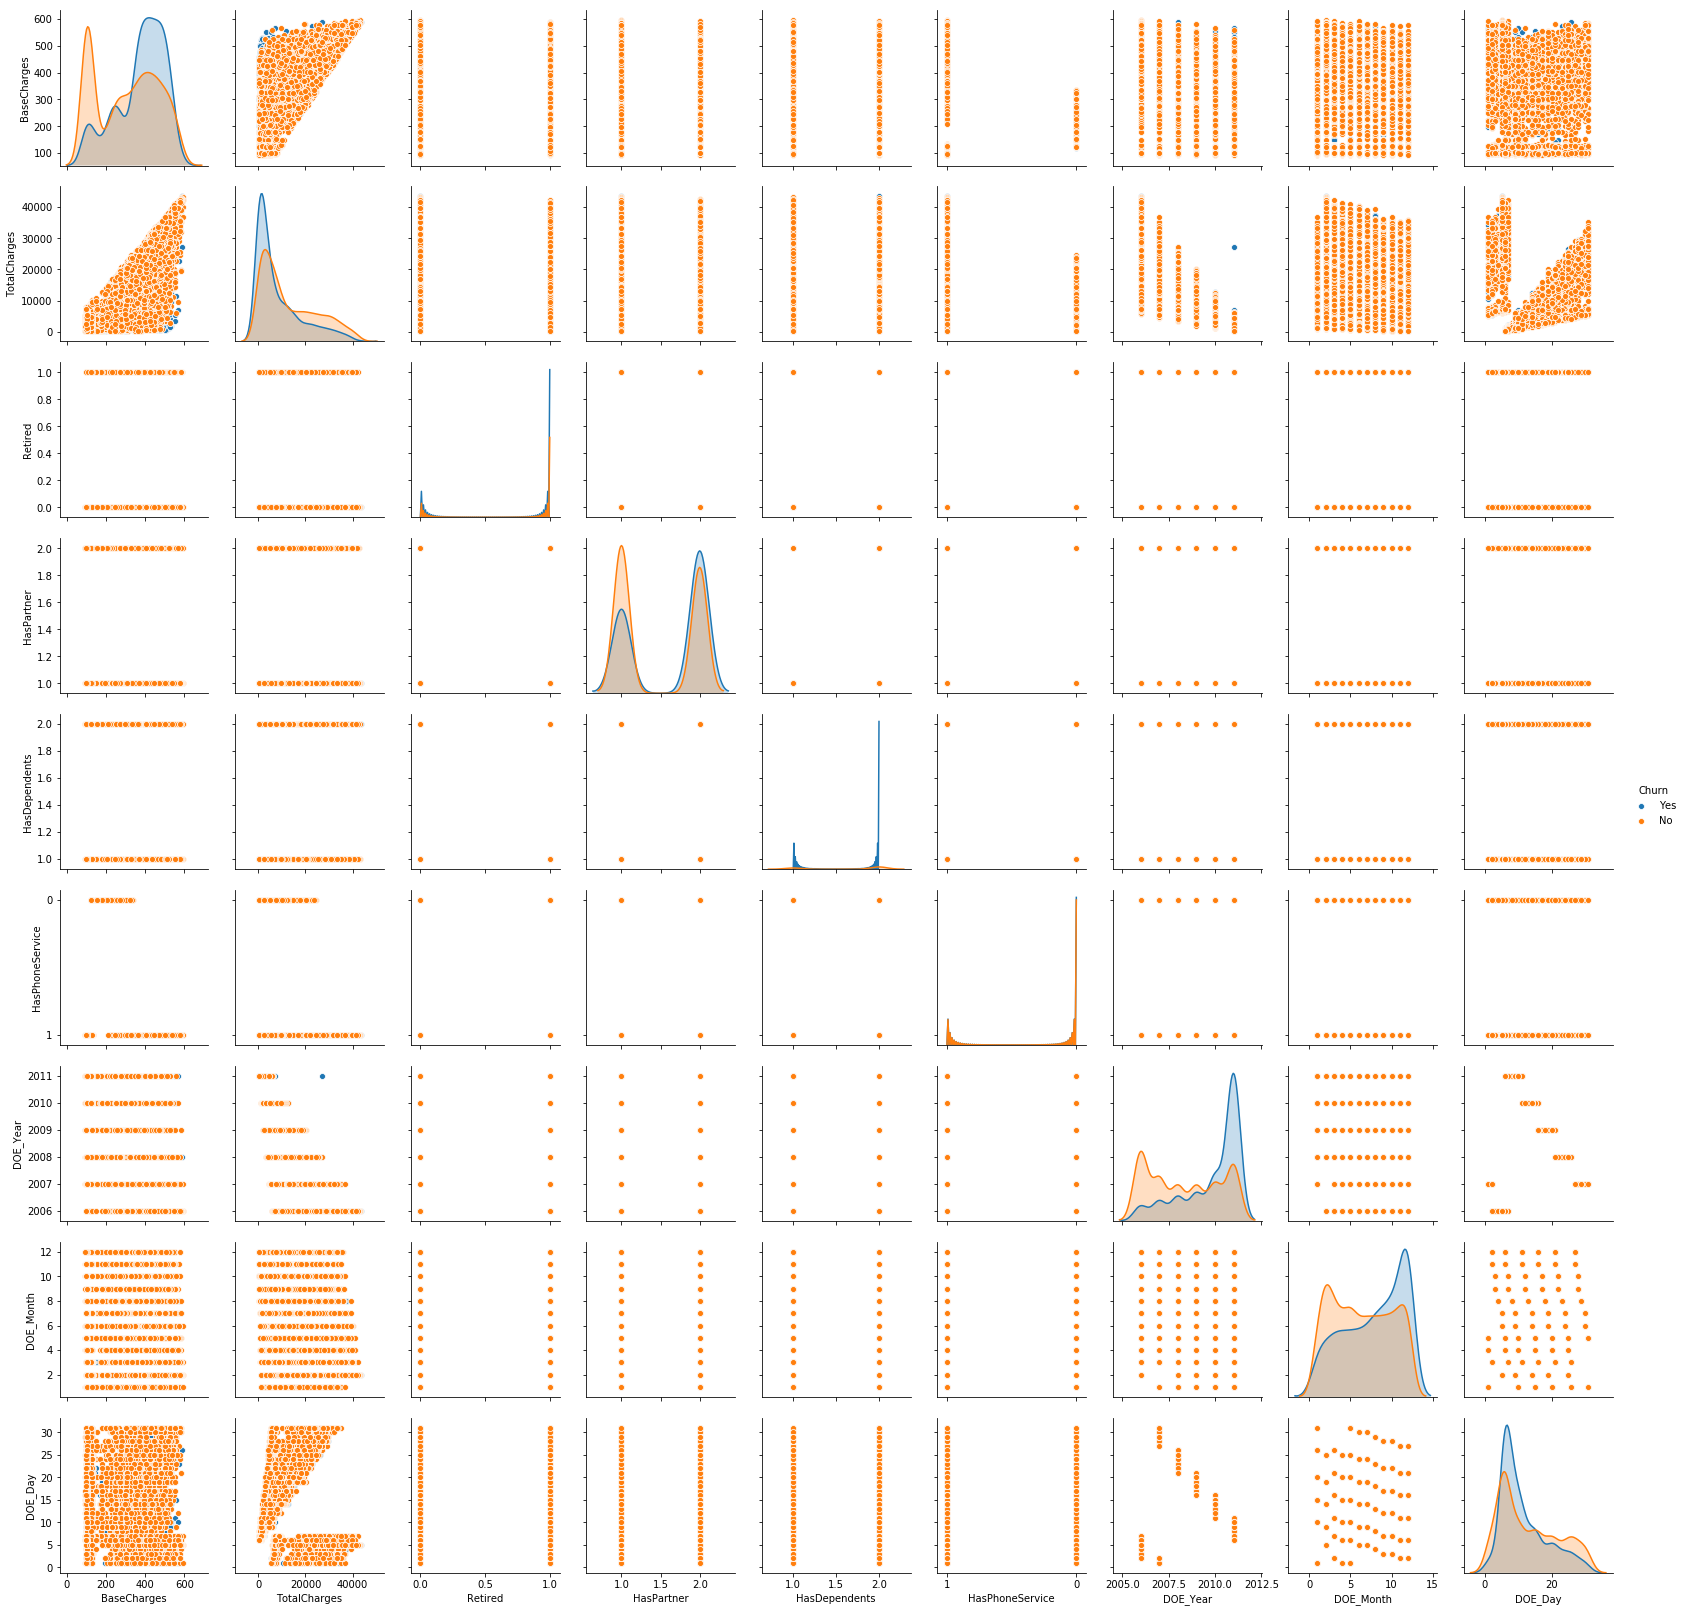

In [139]:
sns.pairplot(df_final,hue='Churn')

In [140]:
#to convert the categorical variables into encoded binary numbers
#and remove the dummies from feature data
df=pd.get_dummies(df_final.iloc[:,1:],drop_first=True)

In [141]:
df.head()

,BaseCharges,TotalCharges,Retired,HasPartner,HasDependents,DOE_Year,DOE_Month,DOE_Day,ElectronicBilling_Yes,ContractType_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTelevision_No internet service,StreamingTelevision_Yes,TechnicalSupport_No internet service,TechnicalSupport_Yes
0,372.00,1498.50,0.0,2.0,2.0,2011.0,9.0,7.0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,100.50,5438.50,0.0,1.0,1.0,2007.0,5.0,1.0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,399.25,10005.00,0.0,2.0,2.0,2010.0,1.0,15.0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,245.00,245.00,0.0,2.0,2.0,2011.0,12.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,320.25,3669.75,0.0,2.0,2.0,2011.0,2.0,9.0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [142]:
X = df.iloc[:, :].values
y = df_final.iloc[:, 0].values

In [143]:
# Encoding target categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [169]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [170]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
X_train.shape

(3951, 36)

In [159]:

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [160]:
explained_variance

array([0.72438592, 0.27561408])

# LogisticRegression

In [171]:
# Fitting K-NN to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

C:\Users\uday1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8163884673748103

# KNN

In [172]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7716236722306525

# Random Forest

In [173]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8012139605462822

# Naive Bayes

In [174]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

[[633 361]
 [ 54 270]]


0.6851289833080425

# SVM

In [175]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

[[928  66]
 [193 131]]


0.8034901365705615

In [176]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\uday1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\uday1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\uday1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\uday1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

(array([0.76280835, 0.77609108, 0.78368121, 0.76660342, 0.77229602,
        0.76280835, 0.76850095, 0.77988615, 0.77609108, 0.76045627]),
 0.7709222877179819)